In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import numpy as np
import ast
from new_utils import calculate_cumulative_gain_ratio
import matplotlib.pyplot as plt

In [49]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'new_combined_data.csv'


# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Now you can work with the DataFrame 'df' as needed
# print(df.head())  

In [50]:
teams_gain_ratios = {}

for index, row in df.iterrows():
    team_name = row['team_name']

    team_wins_string = row['wins']
    team_wins = ast.literal_eval(team_wins_string)

    exp_team_wins_string = row['exp_wins']
    exp_team_wins = ast.literal_eval(exp_team_wins_string)

    cum_gain_ratio = calculate_cumulative_gain_ratio(team_wins, exp_team_wins)

    teams_gain_ratios[team_name] = cum_gain_ratio




In [51]:
#Sorting the dictionary in order to have the teams with higher gain ratio on top

sorted_teams_gain_ratios = dict(sorted(teams_gain_ratios.items(), key=lambda x: x[1][-1], reverse=True))

print(sorted_teams_gain_ratios)

{'Girona': [2.0, 2.8500000000000005, 1.9000000000000004, 2.0250000000000004, 1.9900000000000002, 2.2083333333333335, 1.8928571428571428, 1.93125, 1.8766666666666667, 1.8800000000000001, 1.9318181818181819, 1.9625000000000001], 'Empoli': [0.0, 0.0, 0.0, 0.0, 0.0, 0.35833333333333334, 0.3071428571428571, 0.26875, 1.0722222222222222, 0.9650000000000001, 0.8772727272727273, 1.8041666666666665], 'Nice': [0.0, 0.0, 0.6366666666666666, 2.1025, 2.322, 1.9349999999999998, 1.8900000000000001, 1.96, 1.9544444444444444, 1.959, 1.780909090909091], 'Wolverhampton Wanderers': [0.0, 1.5, 1.0, 0.75, 0.6, 2.1666666666666665, 1.8571428571428572, 1.975, 1.7555555555555555, 1.58, 1.7090909090909092], 'TSG Hoffenheim': [0.0, 1.125, 1.55, 1.8875000000000002, 2.1700000000000004, 1.8083333333333336, 1.9214285714285715, 1.6812500000000001, 1.9611111111111112, 1.7650000000000001, 1.6045454545454547], 'Aston Villa': [1.62, 1.86, 1.24, 1.3925, 1.954, 2.0616666666666665, 1.7671428571428571, 1.7774999999999999, 1.71

In [52]:
#Filter the teams with best performance

N = 20  # Specify the number of teams you want

# Using list comprehension to create a new dictionary with the first N items
# best_teams = dict(list(sorted_teams_gain_ratios.items())[:N])

best_teams = {key: value for key, value in sorted_teams_gain_ratios.items() if value[-1] > 1}

/var/folders/gv/ndz7bsv11mdbb43r479ccdb40000gn/T/ipykernel_80123/693778177.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(index)


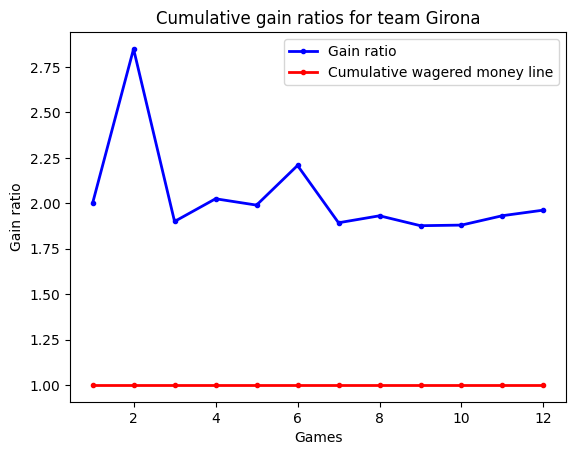

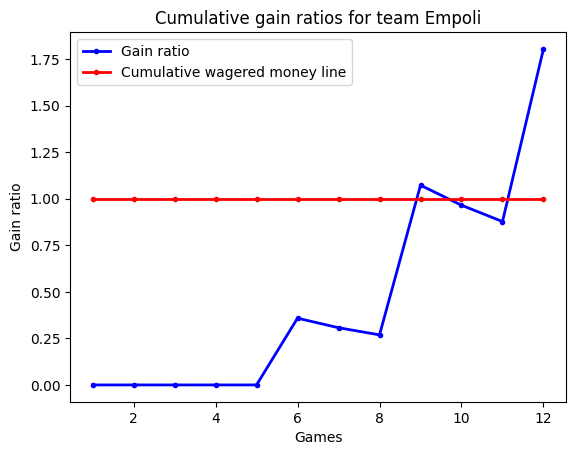

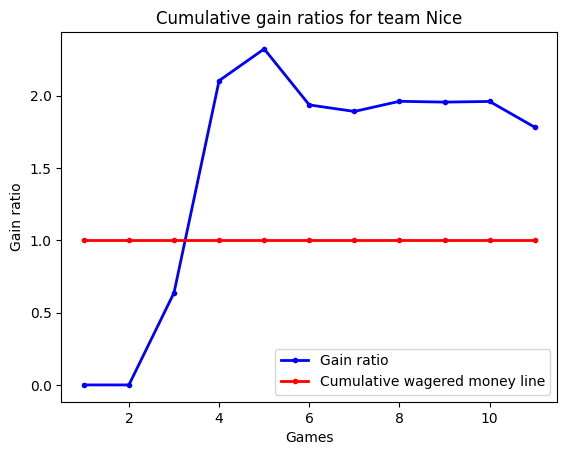

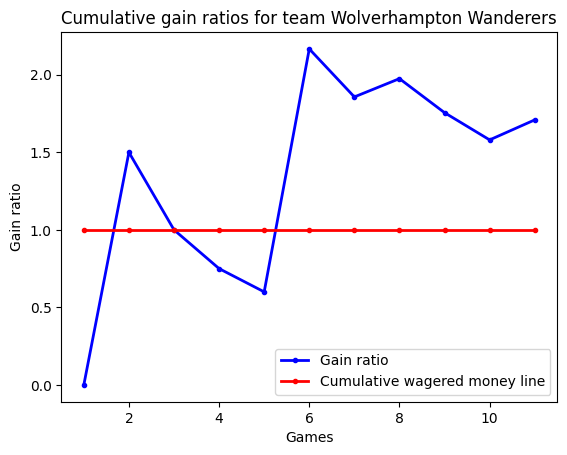

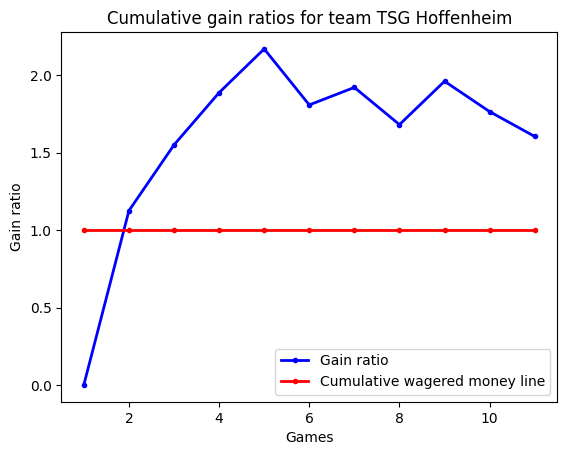

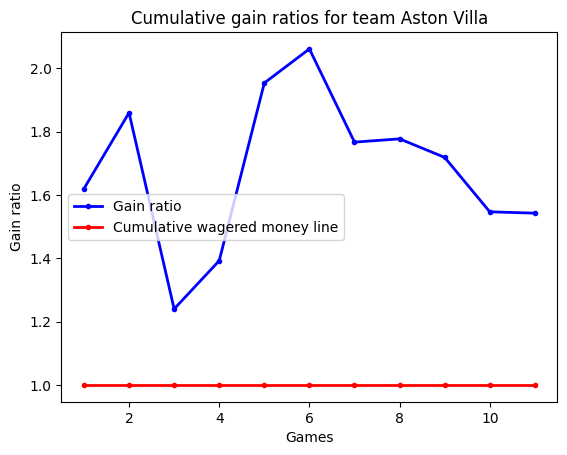

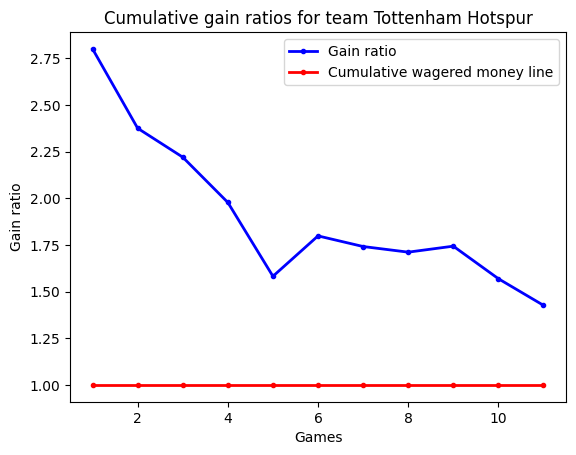

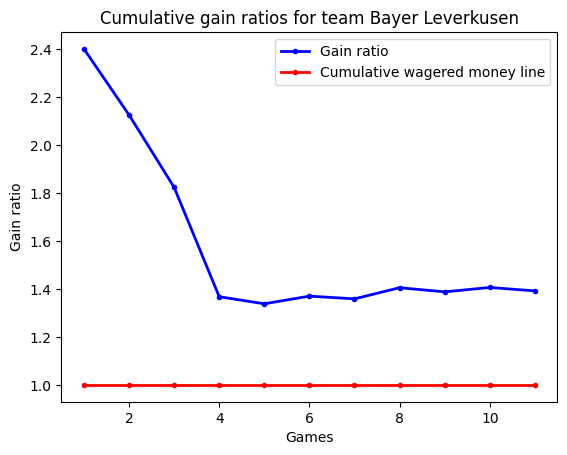

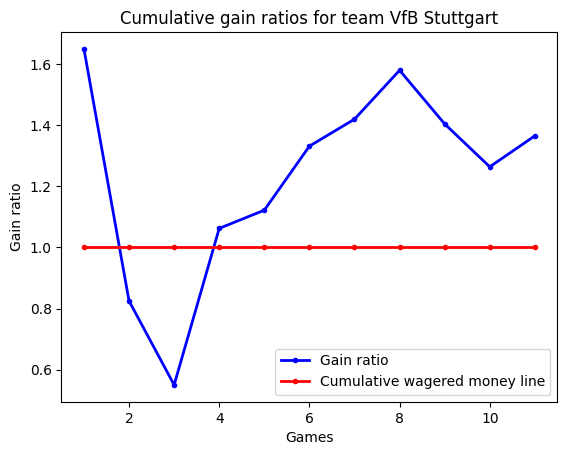

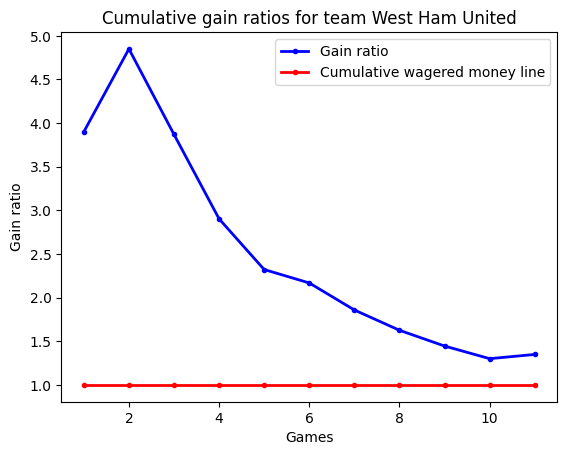

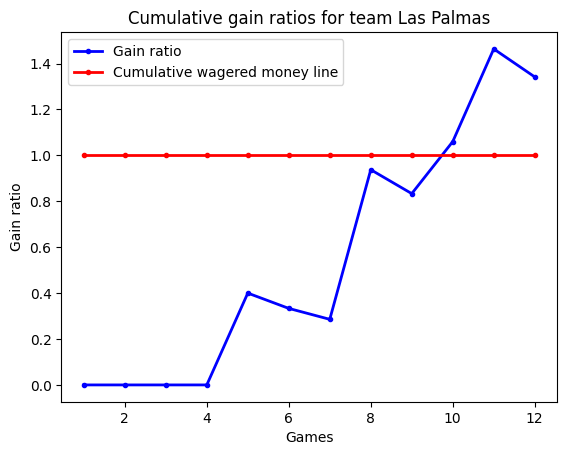

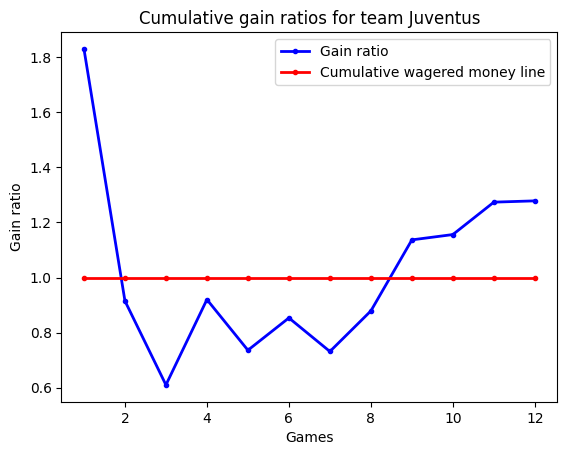

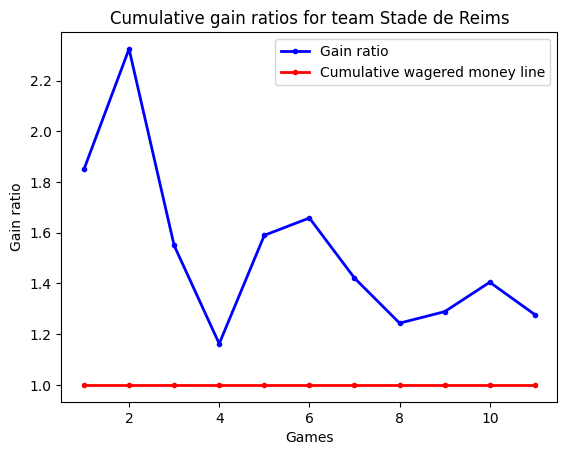

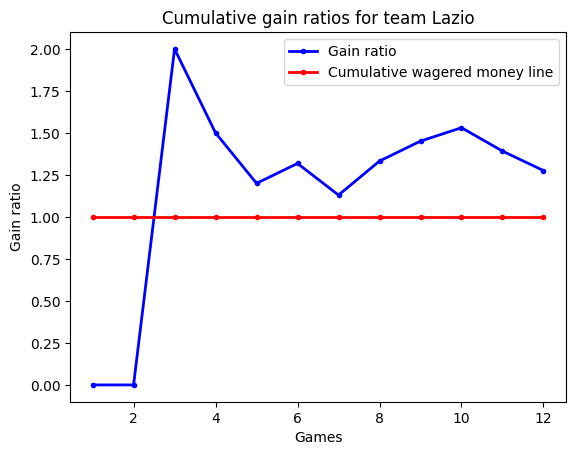

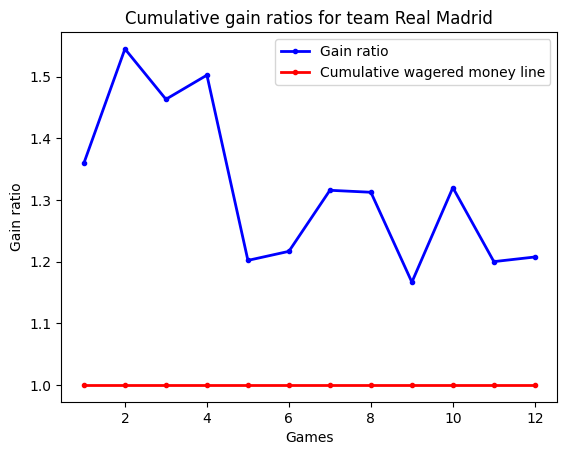

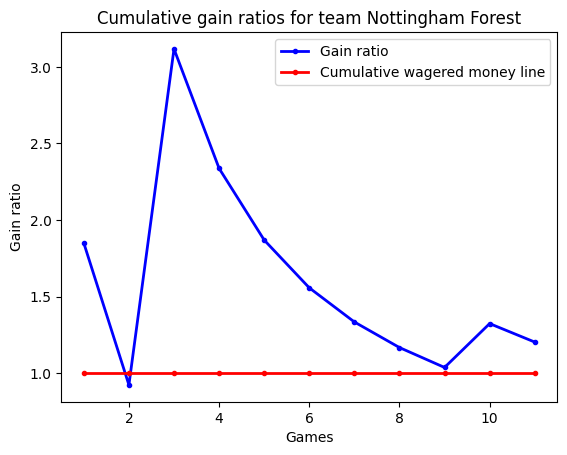

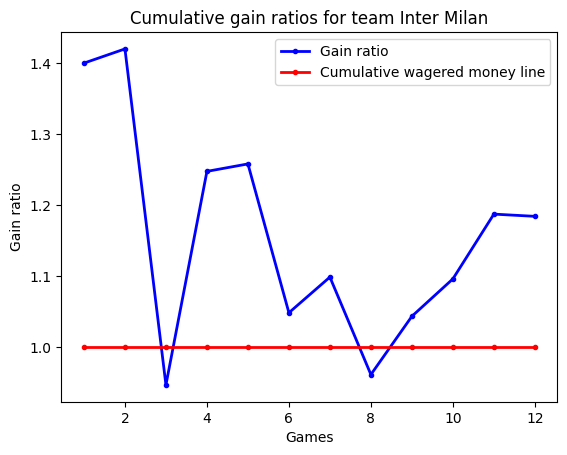

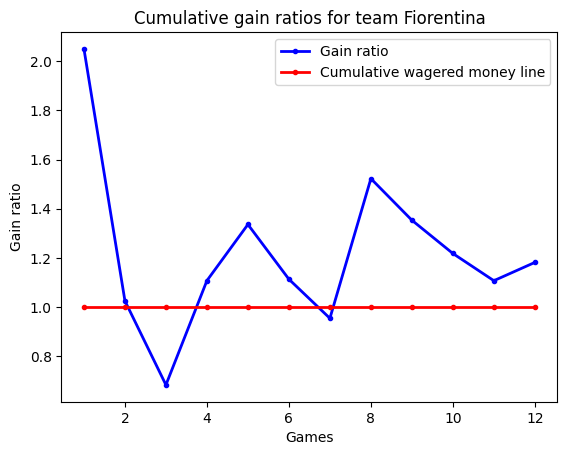

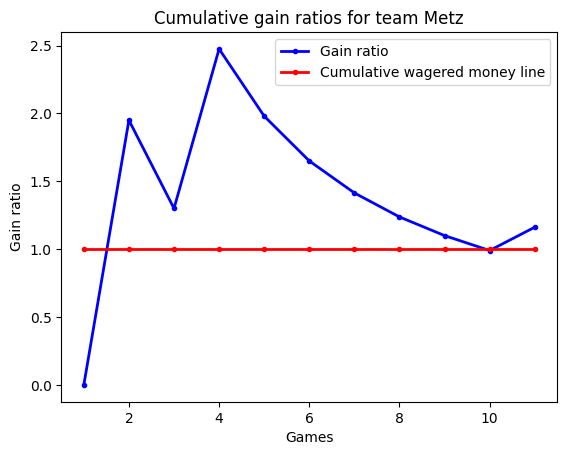

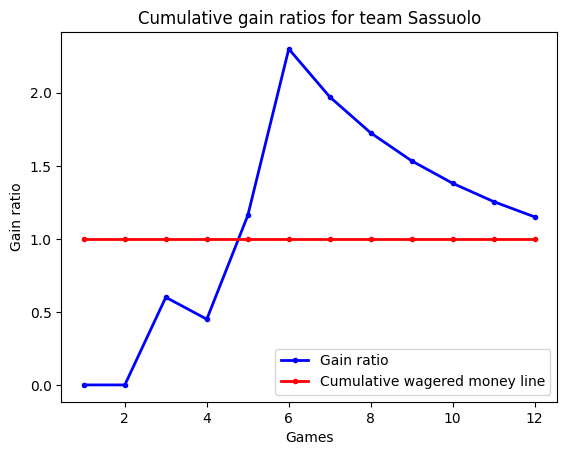

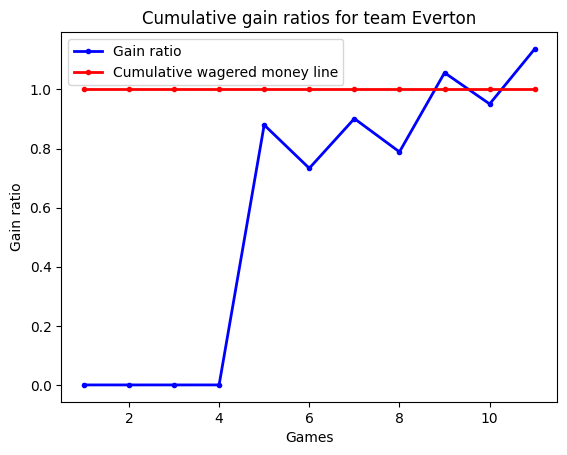

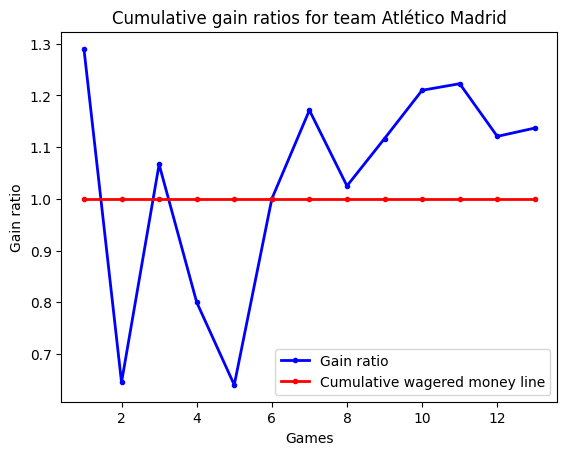

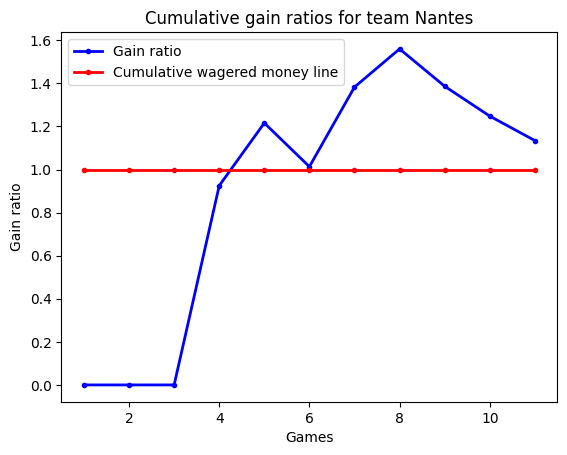

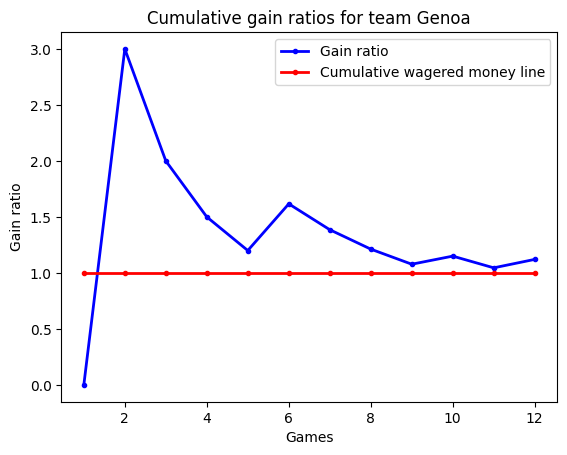

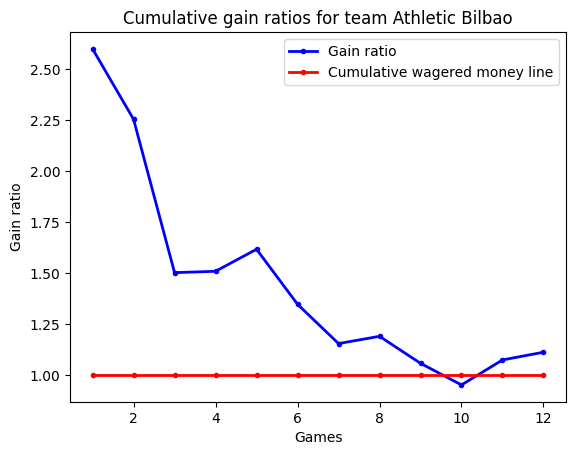

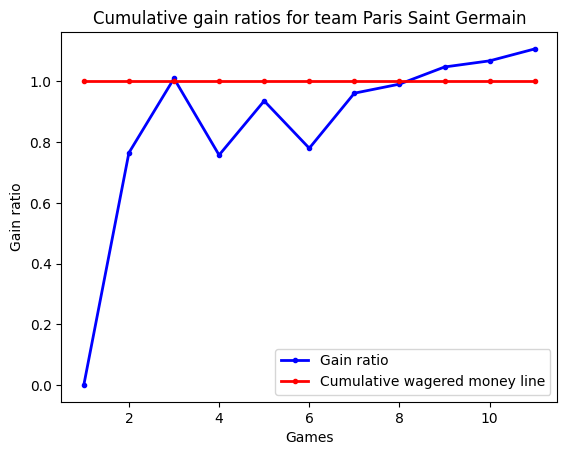

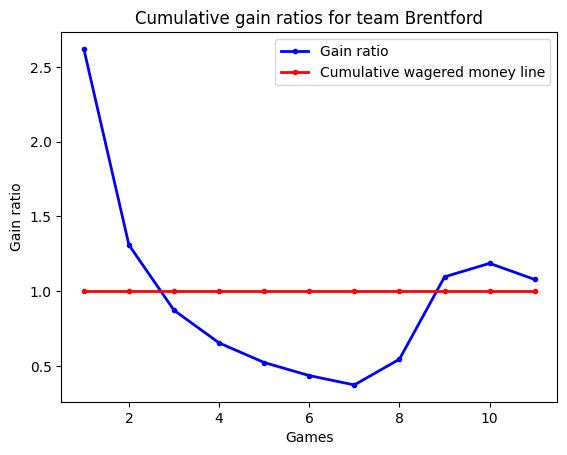

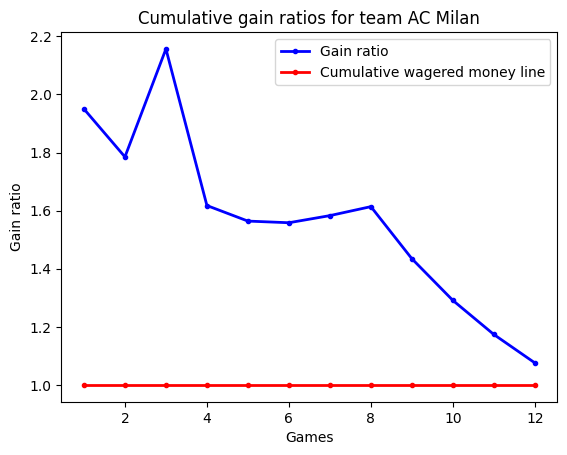

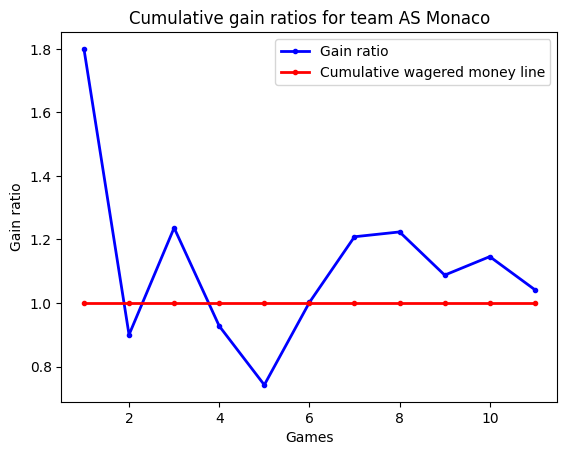

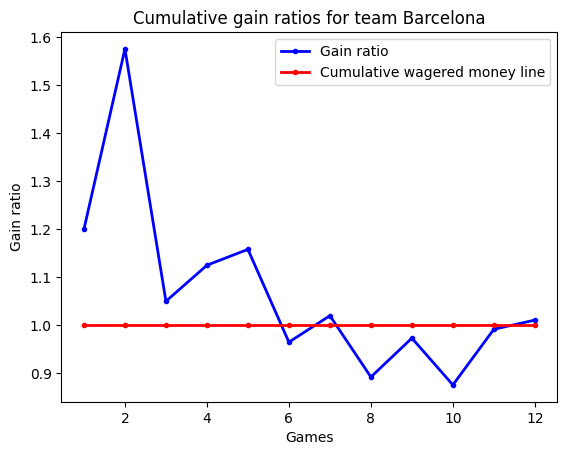

In [53]:
#Plotting best teams performance

index = 1

for key, value in best_teams.items():
    # print(f'Key: {key}, Value: {value}')
    # Create a scatter plot with connecting lines for the cumulative gain ratio
    plt.figure(index)
    x = range(1, len(value) + 1)
    plt.plot(x, value, color='blue', marker='.', linestyle='-', linewidth=2, label='Gain ratio')

    # Create a scatter plot with connecting lines for the reference line
    plt.plot(x, np.ones(len(value)), color='red', marker='.', linestyle='-', linewidth=2, label='Cumulative wagered money line')


    # Adding labels and title
    plt.xlabel('Games')
    plt.ylabel('Gain ratio')
    plt.title(f'Cumulative gain ratios for team {key}')
    # plt.xticks(converted_dates[::2])
    plt.legend()
    index +=1
# Show the plot
plt.show()